In [3]:
from pandas import*
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline

data = read_csv('C:/Users/Putra/Downloads/student_scores.csv')

In [4]:
data.shape

(25, 2)

In [5]:
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
data.sample(10)

,Hours,Scores
1,5.1,47
8,8.3,81
19,7.4,69
24,7.8,86
11,5.9,62
23,6.9,76
20,2.7,30
6,9.2,88
7,5.5,60
16,2.5,30


In [5]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


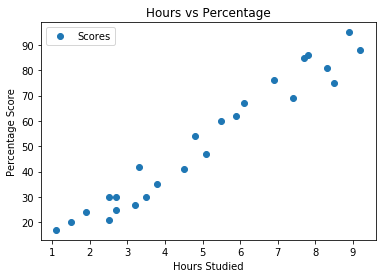

In [6]:
data.plot(x='Hours', y='Scores', style='o')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

# Prepare Data

In [6]:
X = data.iloc[:,:-1].values #subsetting nilai data, x data kolom pertama berupa array 2 dimensi
y = data.iloc[:,-1].values ##subsetting nila data, y data kolom kedua berupa array 2 dimensi


#### Split Data Train and Test from Data

In [8]:
from sklearn.model_selection import train_test_split  #import fungsi split data train dan test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)  #memisah data x,y menjadi dua bagian, yaitu data test dan data train

In [10]:
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(X_train, y_train)  #fit data x dan y dengan cara regresi linear

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [12]:
print(regressor.intercept_) #print intercept persamaan regresi

2.018160041434683


Diperhatikan : <br>
Persamaan Regresi linear pada umumnya adalah : <br>
```  y = b0 + Xb1
  dengan b0 = intercept persamaan y, dan b1 koefisien variabel x. ```
 

In [11]:
b0 = regressor.intercept_

In [12]:
b1 = regressor.coef_

In [13]:
b0

2.018160041434683

In [14]:
b1

array([9.91065648])

## Make Prediction


In [15]:
y_pred = regressor.predict(X_test)

In [16]:
df = DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df 

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


# Mengecek kelayakan model

In [17]:
from sklearn import metrics  
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 4.183859899002975
Mean Squared Error: 21.5987693072174
Root Mean Squared Error: 4.6474476121003665


Karena ```Root Mean Squared Error: 4.6474476121003665``` kurang dari ``` 0.5148 = 10% dari 51.48```

Maka model algoritma layak digunakan

#### Atau dengan menggunakan metode fungsi score()

In [14]:
accurate = regressor.score(X_test,y_test)
accurate

0.9454906892105356

Akurasi sebesar 94%, jadi model layak digunakan untuk data ini.

In [20]:
import pandas as pd
df = pd.read_csv('C:/Users/Putra/Desktop/Data Science/property data.csv')
df

,'PID','ST_NUM','ST_NAME','OWN_OCCUPIED','NUM_BEDROOMS','NUM_BATH','SQ_FT'
0,100001000.0,104.0,PUTNAM,Y,3.0,1.0,1000.0
1,100002000.0,197.0,LEXINGTON,N,3.0,1.5,500.0
2,100003000.0,NaN,LEXINGTON,N,NaN,1.0,850.0
3,100004000.0,201.0,BERKELEY,12,1.0,NaN,700.0
4,NaN,203.0,BERKELEY,Y,3.0,2.0,1600.0
5,100006000.0,207.0,BERKELEY,Y,NaN,1.0,800.0
6,100007000.0,NaN,WASHINGTON,NaN,2.0,NaN,950.0
7,100008000.0,213.0,TREMONT,Y,1.0,1.0,NaN
8,100009000.0,215.0,TREMONT,Y,NaN,2.0,1800.0


In [22]:
df.fillna(method = 'pad')

,'PID','ST_NUM','ST_NAME','OWN_OCCUPIED','NUM_BEDROOMS','NUM_BATH','SQ_FT'
0,100001000.0,104.0,PUTNAM,Y,3.0,1.0,1000.0
1,100002000.0,197.0,LEXINGTON,N,3.0,1.5,500.0
2,100003000.0,197.0,LEXINGTON,N,3.0,1.0,850.0
3,100004000.0,201.0,BERKELEY,12,1.0,1.0,700.0
4,100004000.0,203.0,BERKELEY,Y,3.0,2.0,1600.0
5,100006000.0,207.0,BERKELEY,Y,3.0,1.0,800.0
6,100007000.0,207.0,WASHINGTON,Y,2.0,1.0,950.0
7,100008000.0,213.0,TREMONT,Y,1.0,1.0,950.0
8,100009000.0,215.0,TREMONT,Y,1.0,2.0,1800.0
